<a href="https://colab.research.google.com/github/acrisandradee/validacaomodeloclusterizacao/blob/main/PD_DIABETES_Valida%C3%A7%C3%A3o_de_modelos_de_clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


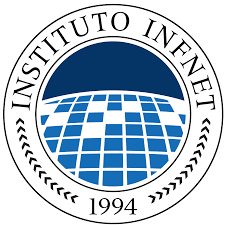



# **Algoritmos de Inteligência Artificial para clusterização**

https://github.com/acrisandradee/algoritimoIAparaclusterizacao/blob/master/pd_cris_andrade.ipynb

Aluno: Cristina de assis andrade
Professor: Charles Bezerra do Prado



# **Infraestrutura**

Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

> 1. Você está rodando em Python 3.9+






In [90]:
!python --version


Python 3.10.12


> 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda

In [91]:
!pip install virtualenv

In [92]:
!virtualenv ambienteVirtual

created virtual environment CPython3.10.12.final.0-64 in 389ms
  creator CPython3Posix(dest=/content/ambienteVirtual, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: contourpy==1.3.1, cycler==0.12.1, fonttools==4.55.3, kiwisolver==1.4.7, matplotlib==3.10.0, numpy==2.2.0, packaging==24.2, pandas==2.2.3, pillow==11.0.0, pip==24.3.1, pyparsing==3.2.0, python_dateutil==2.9.0.post0, pytz==2024.2, setuptools==75.6.0, six==1.17.0, tzdata==2024.2, wheel==0.45.1
  activators BashActivator,CShellActivator,FishActivator,NushellActivator,PowerShellActivator,PythonActivator


In [93]:
!python3 -m venv /content/ambienteVirtual

The virtual environment was not created successfully because ensurepip is not
available.  On Debian/Ubuntu systems, you need to install the python3-venv
package using the following command.

    apt install python3.10-venv

You may need to use sudo with that command.  After installing the python3-venv
package, recreate your virtual environment.

Failing command: /content/ambienteVirtual/bin/python3



> 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico

In [94]:
!ambienteVirtual/bin/python -m pip install numpy pandas matplotlib


> 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.

In [95]:
!pip freeze > requirements.txt

> 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.

In [96]:
!ambienteVirtual/bin/python -c "import sys; print(sys.executable)"

/content/ambienteVirtual/bin/python


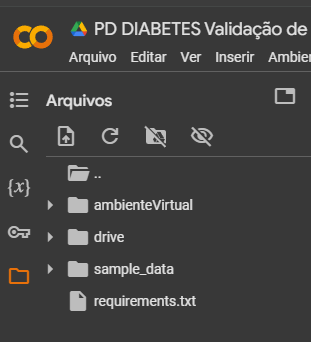

>6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).

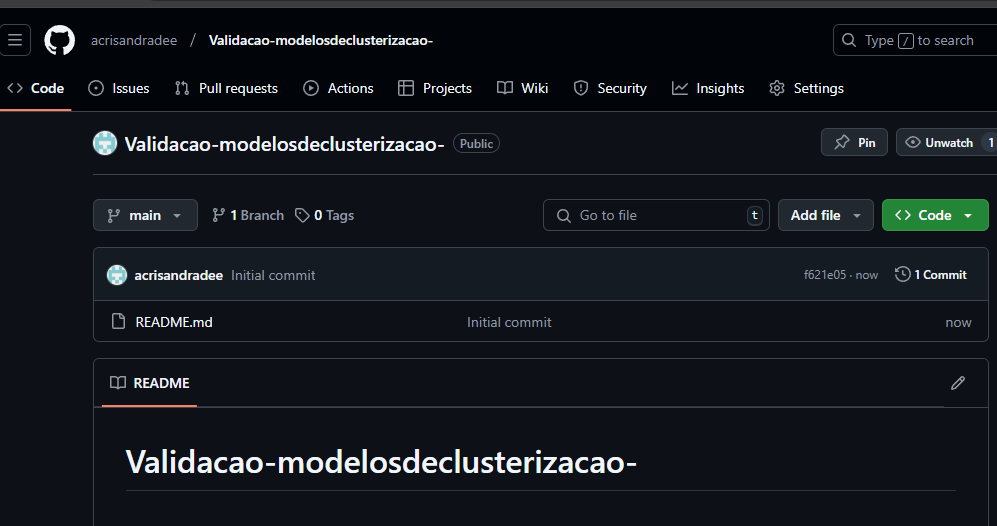

**https://github.com/acrisandradee/Validacao-modelosdeclusterizacao-**



---



# **Escolha de base de dados**

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

> 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.

**https://www.kaggle.com/datasets/tigganeha4/diabetes-dataset-2019**

In [97]:
import pandas as pd
data = '/content/drive/MyDrive/DIABETES/diabetes_dataset__2019.csv'
dados = pd.read_csv(data)
print(dados.info)


<bound method DataFrame.info of               Age  Gender Family_Diabetes highBP      PhysicallyActive   BMI  \
0           50-59    Male              no    yes        one hr or more  39.0   
1           50-59    Male              no    yes  less than half an hr  28.0   
2           40-49    Male              no     no        one hr or more  24.0   
3           50-59    Male              no     no        one hr or more  23.0   
4           40-49    Male              no     no  less than half an hr  27.0   
..            ...     ...             ...    ...                   ...   ...   
947  less than 40    Male             yes     no  more than half an hr  25.0   
948   60 or older    Male             yes    yes  more than half an hr  27.0   
949   60 or older    Male              no    yes                  none  23.0   
950   60 or older    Male              no    yes  less than half an hr  27.0   
951   60 or older  Female             yes    yes        one hr or more  30.0   

    Smo

In [98]:
print(dados.isnull().sum())

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64


In [99]:
import numpy as np
dados.Pregancies.value_counts(dropna=False)


,count
Pregancies,
0.0,754
2.0,64
3.0,60
NaN,42
1.0,28
4.0,4


In [100]:
dados.loc[pd.isnull(dados.BMI), 'BMI'] = dados.BMI.mean()
dados.loc[pd.isnull(dados.Pregancies), 'Pregancies'] = 0
dados.loc[pd.isnull(dados.Pdiabetes), 'Pdiabetes'] = 0
dados.loc[pd.isnull(dados.Diabetic), 'Diabetic'] = 'no'

dados.loc[:, 'Diabetic'] = dados.Diabetic.replace(' no', 'no')
dados.loc[:, 'Pdiabetes'] = dados.Pdiabetes.replace('o', 'no')
dados.loc[:, 'RegularMedicine'] = dados.RegularMedicine.replace('O', 'no')
dados.loc[:, 'BPLevel'] = dados.BPLevel.replace('normal ', 'normal').replace('High', 'high').replace('Low', 'low')


In [101]:
cols_categoricas = dados.select_dtypes(include='object').columns

# Aplica get_dummies em todas as colunas categóricas, convertendo diretamente para inteiro
dataset = pd.get_dummies(dados, columns=cols_categoricas, dtype=int)
dataset

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
0,39.0,8,6,0.0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,28.0,8,6,0.0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
2,24.0,6,6,0.0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
3,23.0,8,6,0.0,0,1,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
4,27.0,8,8,0.0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,25.0,8,6,0.0,0,0,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
948,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
949,23.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
950,27.0,6,5,0.0,0,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   BMI                                    952 non-null    float64
 1   Sleep                                  952 non-null    int64  
 2   SoundSleep                             952 non-null    int64  
 3   Pregancies                             952 non-null    float64
 4   Age_40-49                              952 non-null    int64  
 5   Age_50-59                              952 non-null    int64  
 6   Age_60 or older                        952 non-null    int64  
 7   Age_less than 40                       952 non-null    int64  
 8   Gender_Female                          952 non-null    int64  
 9   Gender_Male                            952 non-null    int64  
 10  Family_Diabetes_no                     952 non-null    int64  
 11  Family

In [103]:
dataset.dtypes

,0
BMI,float64
Sleep,int64
SoundSleep,int64
Pregancies,float64
Age_40-49,int64
Age_50-59,int64
Age_60 or older,int64
Age_less than 40,int64
Gender_Female,int64
Gender_Male,int64


In [104]:
dataset.describe()

,BMI,Sleep,SoundSleep,Pregancies,Age_40-49,Age_50-59,Age_60 or older,Age_less than 40,Gender_Female,Gender_Male,...,BPLevel_low,BPLevel_normal,Pdiabetes_0,Pdiabetes_0,Pdiabetes_no,Pdiabetes_yes,UriationFreq_not much,UriationFreq_quite often,Diabetic_no,Diabetic_yes
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,...,952.000000,952.000000,952.00000,952.000000,952.00000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,25.763713,6.949580,5.495798,0.369748,0.172269,0.163866,0.151261,0.512605,0.390756,0.609244,...,0.029412,0.743697,0.00105,0.983193,0.00105,0.014706,0.697479,0.302521,0.720588,0.279412
std,5.391222,1.273189,1.865618,0.892691,0.377812,0.370348,0.358491,0.500104,0.488176,0.488176,...,0.169047,0.436820,0.03241,0.128614,0.03241,0.120436,0.459591,0.459591,0.448946,0.448946
min,15.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,7.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,29.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.00000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000
max,45.000000,11.000000,11.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


>2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

O dataset escolhido contém informações relacionadas à saúde, como fatores que podem influenciar doenças, hábitos de vida, e dados biométricos. Isso o torna relevante para estudos de análise de padrões, identificação de agrupamentos dentre utros. alem disso o dataset possui variáveis categóricas, numéricas e algumas colunas com valores ausentes, o que representa bem os desafios encontrados em análises reais, testei outros dataset mas mesmo com ajustes nao me retornava um bom resultado.

> 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

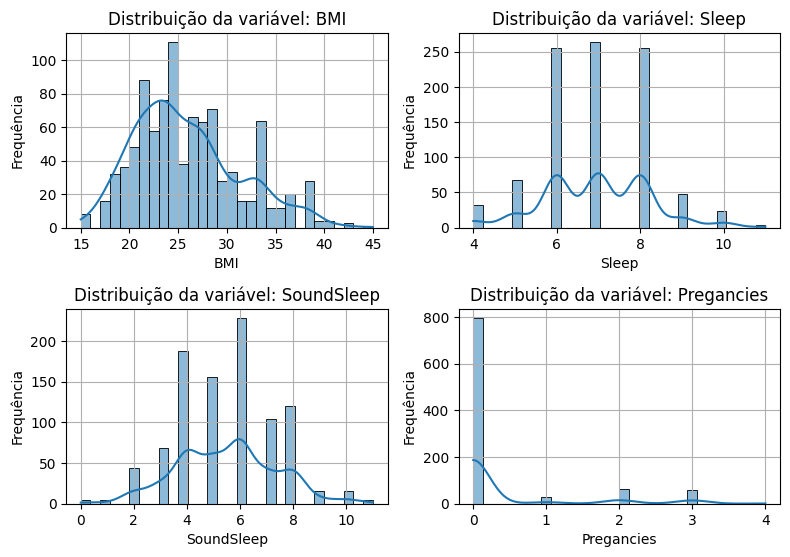

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

variaveis = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

plt.figure(figsize=(8, 8))

for i, var in enumerate(variaveis, 1):
    plt.subplot(3, 2, i)
    sns.histplot(dataset[var], kde=True, bins=30)
    plt.title(f'Distribuição da variável: {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
    plt.grid(True)
plt.tight_layout()
plt.show()


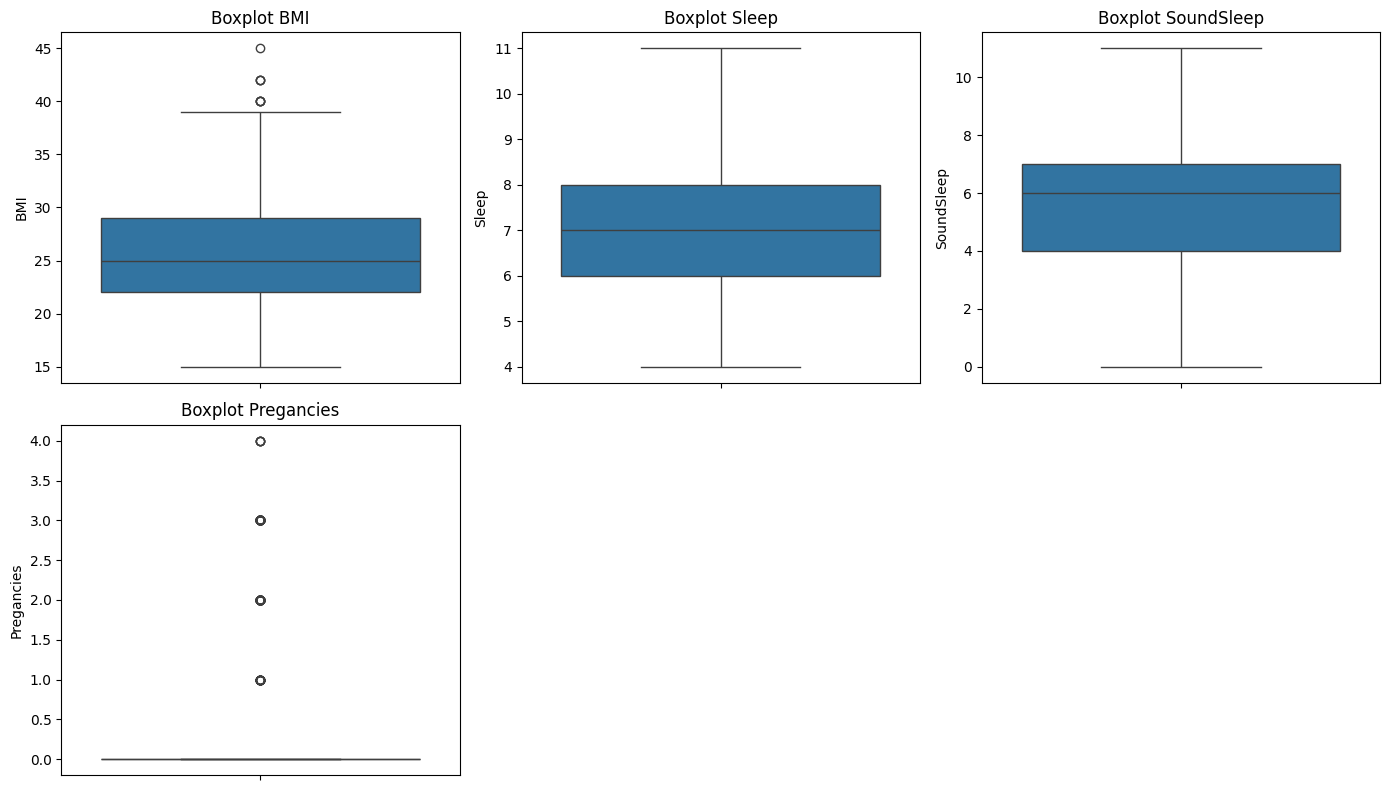

In [106]:
variaveis = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

plt.figure(figsize=(14, 8))
for i, coluna in enumerate(variaveis, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=dataset, y=coluna)
    plt.title(f'Boxplot {coluna}')
    plt.xlabel('')
    plt.ylabel(coluna)

plt.tight_layout()
plt.show()

>4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

In [107]:
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['BMI', 'Sleep', 'SoundSleep', 'Pregancies']

scaler = StandardScaler()

dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

dataset_ajustado = dataset[columns_to_scale]

dataset_ajustado


,BMI,Sleep,SoundSleep,Pregancies
0,2.456446,0.825465,0.270402,-0.414413
1,0.415020,0.825465,0.270402,-0.414413
2,-0.327317,-0.746220,0.270402,-0.414413
3,-0.512902,0.825465,0.270402,-0.414413
4,0.229435,0.825465,1.342997,-0.414413
...,...,...,...,...
947,-0.141733,0.825465,0.270402,-0.414413
948,0.229435,-0.746220,-0.265895,-0.414413
949,-0.512902,-0.746220,-0.265895,-0.414413
950,0.229435,-0.746220,-0.265895,-0.414413




---



# **Clusterização**

Para os dados pré-processados da etapa anterior você irá:

>1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:

a. K-Médias

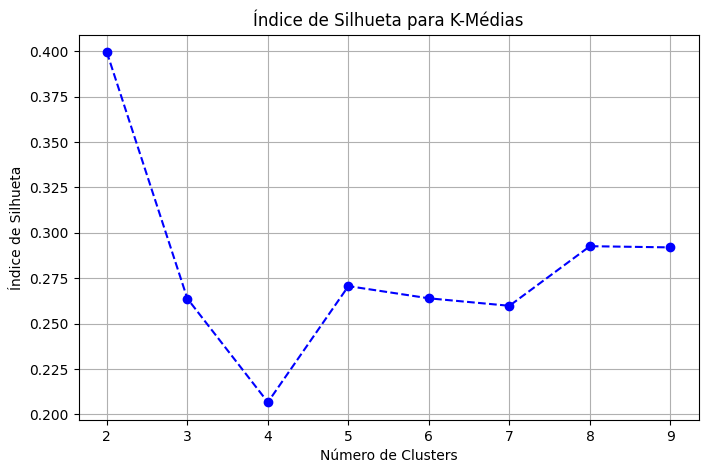

Melhor número de clusters (K-Means): 2


In [108]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Testar diferentes números de clusters
silhouette_scores = []
clusters_range = range(2, 10)
for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(dataset_ajustado)
    silhouette_avg = silhouette_score(dataset_ajustado, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 5))
plt.plot(clusters_range, silhouette_scores, marker='o', linestyle='--', color='b')
plt.title('Índice de Silhueta para K-Médias')
plt.xlabel('Número de Clusters')
plt.ylabel('Índice de Silhueta')
plt.grid(True)
plt.show()

# Escolher o melhor número de clusters
best_kmeans_clusters = clusters_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Melhor número de clusters (K-Means): {best_kmeans_clusters}')

In [109]:
from sklearn.cluster import KMeans

n_clusters = best_kmeans_clusters

kmeans = KMeans(n_clusters=n_clusters, random_state=42)

kmeans_labels = kmeans.fit_predict(dataset_ajustado[columns_to_scale])

dataset_ajustado['KMeans_Cluster'] = kmeans_labels

dataset_ajustado.head()


<ipython-input-109-70607e3a3b69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ajustado['KMeans_Cluster'] = kmeans_labels


,BMI,Sleep,SoundSleep,Pregancies,KMeans_Cluster
0,2.456446,0.825465,0.270402,-0.414413,0
1,0.415020,0.825465,0.270402,-0.414413,0
2,-0.327317,-0.746220,0.270402,-0.414413,0
3,-0.512902,0.825465,0.270402,-0.414413,0
4,0.229435,0.825465,1.342997,-0.414413,0


In [110]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg = silhouette_score(dataset_ajustado[columns_to_scale], dataset_ajustado['KMeans_Cluster'])

print("Silhouette Coefficient:", silhouette_avg)

Silhouette Coefficient: 0.3994814281052966


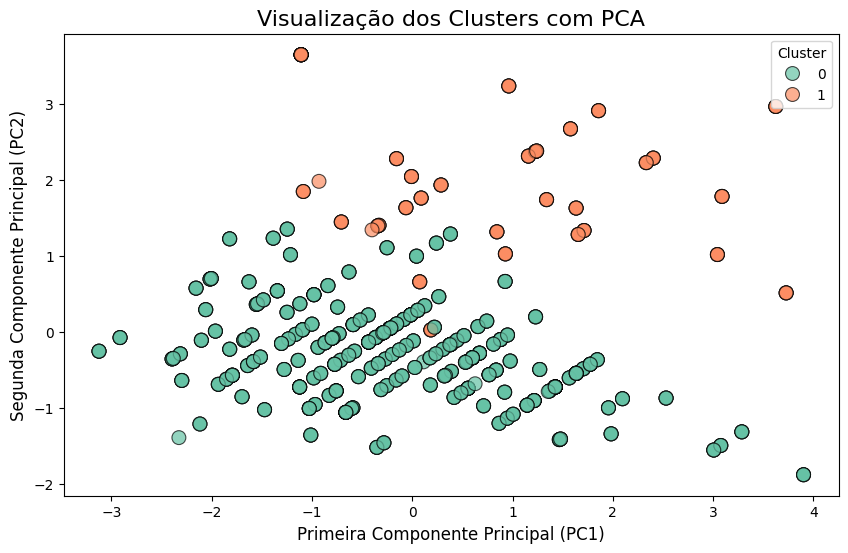

In [111]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset_ajustado[columns_to_scale])


pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

pca_df['Cluster'] = dataset_ajustado['KMeans_Cluster']


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='Set2', data=pca_df, s=100, alpha=0.7, edgecolor='black')

plt.title('Visualização dos Clusters com PCA', fontsize=16)
plt.xlabel('Primeira Componente Principal (PC1)', fontsize=12)
plt.ylabel('Segunda Componente Principal (PC2)', fontsize=12)
plt.legend(title='Cluster', loc='upper right')

plt.show()


b.DBScan

Melhores parâmetros para DBSCAN: eps=0.3, min_samples=3, índice de silhueta=0.7872141574078897


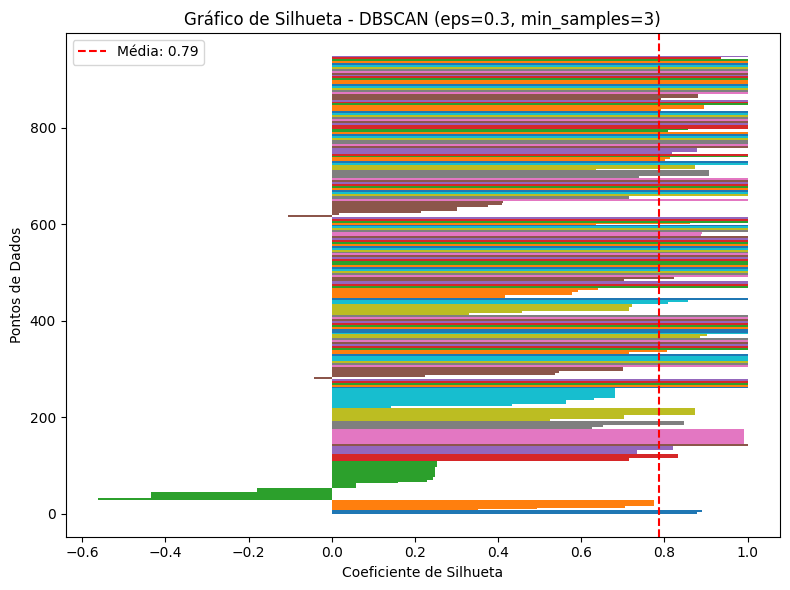

In [112]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt


silhouette_scores_dbscan = []
eps_values = np.arange(0.3, 3.1, 3.0)
min_samples_values = range(3, 15)
# Realizar grid search para encontrar os melhores parâmetros
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(dataset_ajustado)


        if len(set(dbscan_labels)) > 1:
            silhouette_avg = silhouette_score(dataset_ajustado, dbscan_labels)
            silhouette_scores_dbscan.append((eps, min_samples, silhouette_avg))


best_params = max(silhouette_scores_dbscan, key=lambda x: x[2])
print(f'Melhores parâmetros para DBSCAN: eps={best_params[0]}, min_samples={best_params[1]}, índice de silhueta={best_params[2]}')


dbscan = DBSCAN(eps=best_params[0], min_samples=best_params[1])
dbscan_labels = dbscan.fit_predict(dataset_ajustado)

filtered_data = dataset_ajustado[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]

# Função para plotar o gráfico de silhueta
def plot_silhouette(data, labels, model_name, avg_silhouette):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower, y_upper = 0, 0
    unique_clusters = np.unique(labels)

    plt.figure(figsize=(8, 6))

    for cluster in unique_clusters:
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(avg_silhouette, color="red", linestyle="--", label=f"Média: {avg_silhouette:.2f}")
    plt.title(f"Gráfico de Silhueta - DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})")
    plt.xlabel("Coeficiente de Silhueta")
    plt.ylabel("Pontos de Dados")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plotar o gráfico de silhueta com os melhores parâmetros
plot_silhouette(filtered_data, filtered_labels, "DBSCAN (Melhores Parâmetros)", best_params[2])

In [113]:
dbscan_labels = dbscan.fit_predict(dataset_ajustado)

# Adicionar os rótulos de cluster no dataset ajustado
dataset_ajustado['DBSCAN_Cluster'] = dbscan_labels



<ipython-input-113-a95675e7ceb5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_ajustado['DBSCAN_Cluster'] = dbscan_labels


>2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.

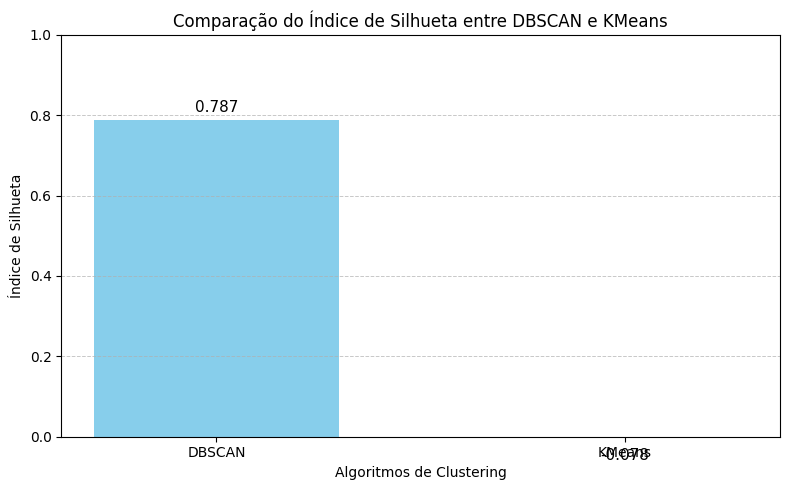

In [114]:
import matplotlib.pyplot as plt

model_names = ['DBSCAN', 'KMeans']
silhouette_scores = [best_params[2], silhouette_avg]


plt.figure(figsize=(8, 5))
plt.bar(model_names, silhouette_scores, color=['skyblue', 'orange'], width=0.6)
plt.title('Comparação do Índice de Silhueta entre DBSCAN e KMeans')
plt.ylabel('Índice de Silhueta')
plt.xlabel('Algoritmos de Clustering')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

for i, score in enumerate(silhouette_scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=11)


plt.tight_layout()
plt.show()


O indice de silhueta é uma métrica usada para avaliar a qualidade de agrupamento em modelos de clusterização.
e realizado o calculo do indice de silhueta.onde para cada conjunto de dados a coesao calcula a dostancia media do ponto ate o outro do mesmo cluster. A separação calcula a distancia media do ponto para os pontos do cluster mais proximo. o resultado  variam para 1 indicando que o ponto esta bem agrupado, 0 o ponto esta no limite entre clusters e -1, o ponto pode estar em um cluster errado.

* 1: Indica que o ponto está bem agrupado no cluster correto.
* 0: Indica que o ponto está no limite entre clusters.
* -1: Sugere que o ponto pode estar alocado em um cluster incorreto.


para determinar o numero ideal de clusters, o indice de silhueta medio e calculado para diferentes valores de K, sendo escolhido aquele que maximiza a separacao e coesao dos clusters essa metrica fornece um criterio quantitativo para a validacao da qualidade do agrupamento. e entgao visualizamos o grafico com a distribuicao dos pontos em cada cluster.

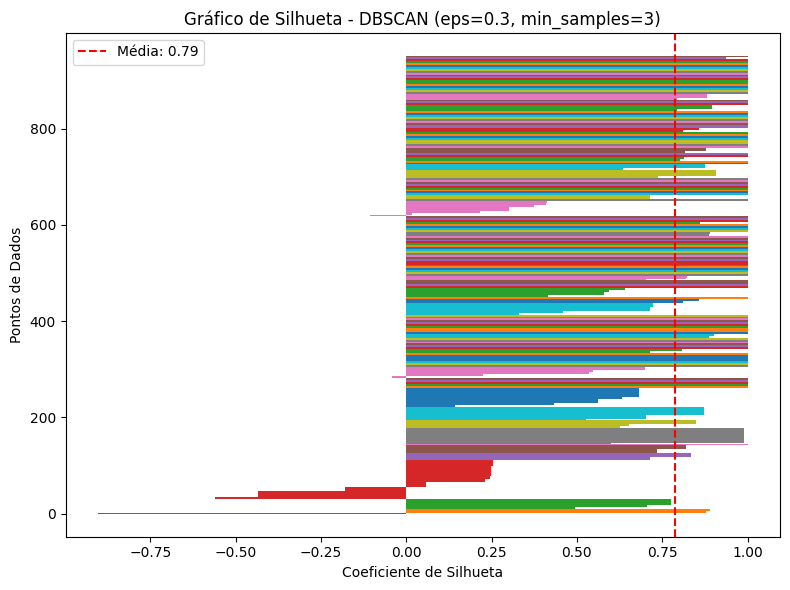

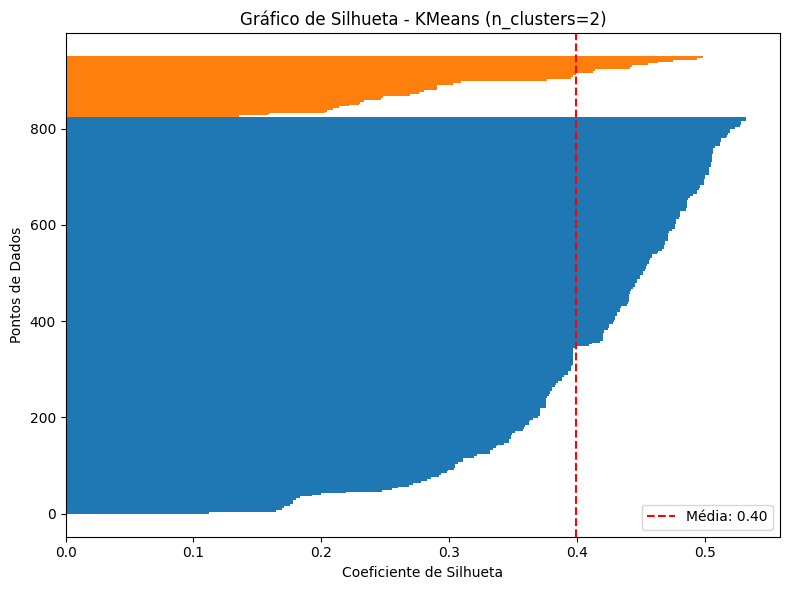

In [115]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples

def plot_silhouette(data, labels, model_name, avg_silhouette):
    silhouette_vals = silhouette_samples(data, labels)
    y_lower, y_upper = 0, 0
    unique_clusters = np.unique(labels)

    plt.figure(figsize=(8, 6))

    for cluster in unique_clusters:
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1.0)
        y_lower += len(cluster_silhouette_vals)

    plt.axvline(avg_silhouette, color="red", linestyle="--", label=f"Média: {avg_silhouette:.2f}")
    plt.title(f"Gráfico de Silhueta - {model_name}")
    plt.xlabel("Coeficiente de Silhueta")
    plt.ylabel("Pontos de Dados")
    plt.legend()
    plt.tight_layout()
    plt.show()

dbscan_avg_silhouette = np.mean(silhouette_samples(dataset_ajustado[columns_to_scale], dbscan_labels))


kmeans_avg_silhouette = np.mean(silhouette_samples(dataset_ajustado[columns_to_scale], kmeans_labels))

plot_silhouette(dataset_ajustado[columns_to_scale], dbscan_labels,
                f"DBSCAN (eps={best_params[0]}, min_samples={best_params[1]})", dbscan_avg_silhouette)

plot_silhouette(dataset_ajustado[columns_to_scale], kmeans_labels,
                f"KMeans (n_clusters={best_kmeans_clusters})", kmeans_avg_silhouette)


>3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

Comparando o indice de silhueta entre os dois, o dbscan nos deu um indice com alta coesao e boa separacao entre os clusters isso sugere que o dbscan conseguiu capturar adequadamente os padroes intrinsecos do dataset. porem o kmeans apresentou o indice baixo indicando clusters menos coesos e apresentando maior sobreposicao entre si.Na análise da distribuição dos clusters, o DBSCAN se destacou ao identificar múltiplos agrupamentos de formas irregulares, adaptando-se a densidades variadas e mostrando robustez contra outliers.o K-Means, devido à sua suposição de clusters esféricos, gerou agrupamentos mais rígidos e artificiais. Essa limitação resultou em uma segmentação que não reflete adequadamente a estrutura dos dados.
o DBSCAN apresentou resultados superiores para o dataset analisado, sendo mais eficaz na identificação de padrões não lineares e na adaptação à estrutura dos dados.Essas diferenças destacam a importância de selecionar o método de clusterização mais adequado às características específicas do dataset.

>4.Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados.

Índice de Davies-Bouldin (DBI): Mede a compactação dos clusters e a separação entre eles.

In [116]:
from sklearn.metrics import davies_bouldin_score

dbi_kmeans = davies_bouldin_score(dataset_ajustado[columns_to_scale], kmeans_labels)

dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
dbscan_valid_data = dataset_ajustado[columns_to_scale].iloc[dbscan_labels != -1]
dbi_dbscan = davies_bouldin_score(dbscan_valid_data, dbscan_valid_labels)

print(f"Índice de Davies-Bouldin (K-Means): {dbi_kmeans:.3f}")
print(f"Índice de Davies-Bouldin (DBSCAN): {dbi_dbscan:.3f}")


Índice de Davies-Bouldin (K-Means): 1.186
Índice de Davies-Bouldin (DBSCAN): 0.251


Calinski-Harabasz: Avaliar a dispersão inter e intra-cluster.

In [117]:
from sklearn.metrics import calinski_harabasz_score

chi_kmeans = calinski_harabasz_score(dataset_ajustado[columns_to_scale], kmeans_labels)

dbscan_valid_labels = dbscan_labels[dbscan_labels != -1]
dbscan_valid_data = dataset_ajustado[columns_to_scale].iloc[dbscan_labels != -1]
chi_dbscan = calinski_harabasz_score(dbscan_valid_data, dbscan_valid_labels)

print(f"Índice de Calinski-Harabasz (K-Means): {chi_kmeans:.3f}")
print(f"Índice de Calinski-Harabasz (DBSCAN): {chi_dbscan:.3f}")


Índice de Calinski-Harabasz (K-Means): 290.044
Índice de Calinski-Harabasz (DBSCAN): 769.124


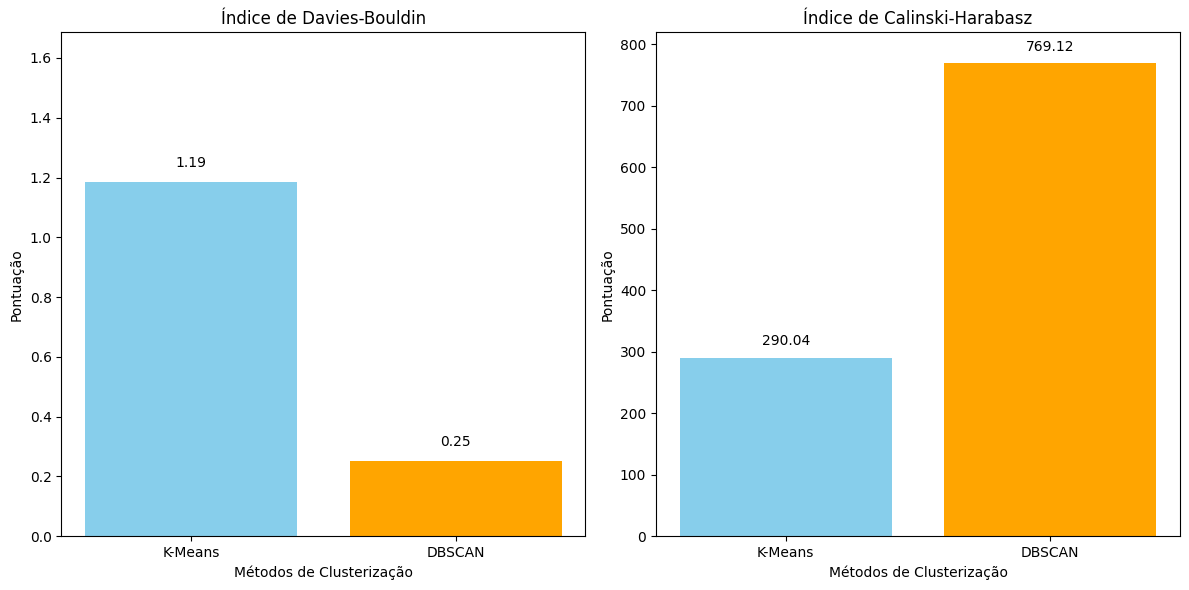

In [118]:
methods = ['K-Means', 'DBSCAN']
davies_bouldin_scores = [dbi_kmeans, dbi_dbscan]
calinski_harabasz_scores = [chi_kmeans, chi_dbscan]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(methods, davies_bouldin_scores, color=['skyblue', 'orange'])
plt.title('Índice de Davies-Bouldin')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)
for i, score in enumerate(davies_bouldin_scores):
    plt.text(i, score + 0.05, f"{score:.2f}", ha='center', fontsize=10)

# Gráfico para o Índice de Calinski-Harabasz
plt.subplot(1, 2, 2)
plt.bar(methods, calinski_harabasz_scores, color=['skyblue', 'orange'])
plt.title('Índice de Calinski-Harabasz')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(calinski_harabasz_scores) + 50)
for i, score in enumerate(calinski_harabasz_scores):
    plt.text(i, score + 20, f"{score:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()


>5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

O indice de silhueta nao e uma boa metrica para determinar o numero de clusters no DBSCAN por conta de presença de ruidos. como vimos acima as métricas como o índice de Davies-Bouldin e o índice de Calinski-Harabasz são mais robustas e adequadas para avaliar a qualidade dos agrupamentos gerados pelo DBSCAN.A silhueta pode ser usada como apoio, mas não é a mais indicada para o DBSCAN.

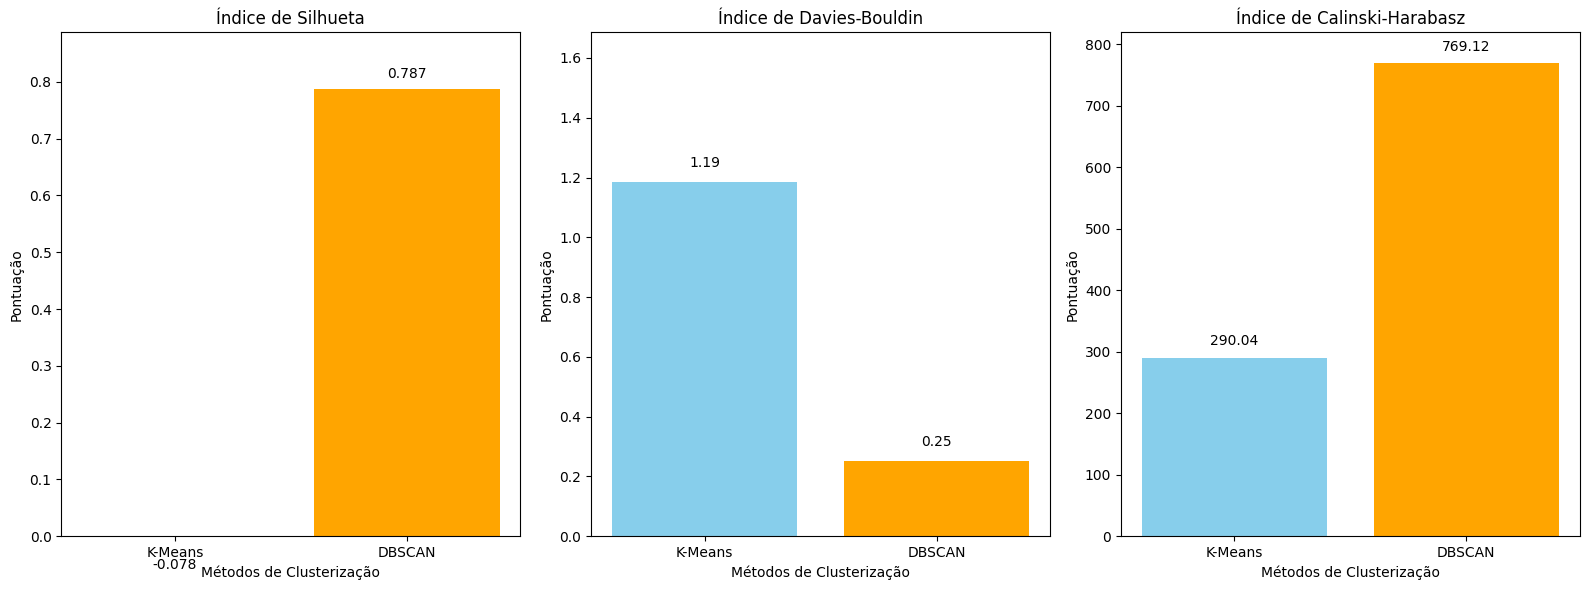

In [119]:
methods = ['K-Means', 'DBSCAN']
silhouette_scores = [silhouette_avg, best_params[2]]
davies_bouldin_scores = [dbi_kmeans, dbi_dbscan]
calinski_harabasz_scores = [chi_kmeans, chi_dbscan]


plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.bar(methods, silhouette_scores, color=['skyblue', 'orange'])
plt.title('Índice de Silhueta')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(silhouette_scores) + 0.1)
for i, score in enumerate(silhouette_scores):
    plt.text(i, score + 0.02, f"{score:.3f}", ha='center', fontsize=10)


plt.subplot(1, 3, 2)
plt.bar(methods, davies_bouldin_scores, color=['skyblue', 'orange'])
plt.title('Índice de Davies-Bouldin')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(davies_bouldin_scores) + 0.5)
for i, score in enumerate(davies_bouldin_scores):
    plt.text(i, score + 0.05, f"{score:.2f}", ha='center', fontsize=10)

plt.subplot(1, 3, 3)
plt.bar(methods, calinski_harabasz_scores, color=['skyblue', 'orange'])
plt.title('Índice de Calinski-Harabasz')
plt.ylabel('Pontuação')
plt.xlabel('Métodos de Clusterização')
plt.ylim(0, max(calinski_harabasz_scores) + 50)
for i, score in enumerate(calinski_harabasz_scores):
    plt.text(i, score + 20, f"{score:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()




---



# **Medidas de similaridade**

>1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

Para agrupar 10 séries temporais distintas em 3 grupos com base no valor máximo de correlação cruzada entre elas, é necessário seguir uma sequência de etapas que envolvem:

* O pre processamento das series temporais. verificar se ha valores ausentes e tratalos, e se necessario aplicar a normalização.
* depois calculamos a correlação cruzada entre duas series temporais, ela mede o quao similar são as series temporais.
*  a partir dai temos a matriz de similaridade onde cada elemento da matriz representa o valor máximo de correlação cruzada entre duas séries temporais. e entao aplicamos um algoritimo de agrupamento.
* E entao determinamos o numero de clusters como o objetivo é agrupar em 3 clusters, definIMOS o número de clusters a ser utilizado no algoritmo de agrupamento neste caso, 3.
* E entao avaliamoa nosso resultado plotando as series temporais  e podemos utilizar a netrica sulhuette para avaliar a qualidade do agrupamento formado.

>2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

Podemos utilizar o agrupamento hierárquico pois ele e baseado em similaridade, requer uma matriz de similaridade onde as series temporais são agrupadas de acordo com a correlação máxima entre elas.ele nos da uma interpretação visual clara por meio de um dendrograma, que mostra a estrutura de similaridade entre as séries

>3.Indique um caso de uso para essa solução projetada.


O caso de analise temporais de clima por exemplo. para identificar padroes, é possível ter várias séries temporais representando as temperaturas diárias de diferentes regiões ou cidades ao longo de um ano ou mais. Cada série temporal representaria o histórico diário de temperatura de uma determinada localidade.Agrupamos as regiões em clusters com padrões climáticos semelhantes, com base na correlação máxima entre suas séries temporais de temperatura.

>4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

Os dois métodos mais conhecidos para medir a similaridade entre séries temporais são a correlação de Pearson e a DTW. A correlação de Pearson mede a força e a direção da relação linear entre duas séries temporais. Já a DTW mede a similaridade entre duas séries ao alinhar seus pontos no tempo, levando em conta deslocamentos temporais e variações no ritmo das séries. A DTW é especialmente útil quando as séries podem ter distorções temporais.